In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import sys
import matplotlib.patches as patches

In [2]:
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10
    # as long as the OverflowError occurs.
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)
# reader=csv.reader('C:/Users/kedar/OneDrive - UCB-O365/Documents/Thesis/twitch plays/analysis/myfile.csv')
with open("C:/Users/kedar/OneDrive - UCB-O365/Documents/Thesis/twitch plays/data/wholedata.csv",  encoding="utf8") as file:
    reader=csv.reader(file)
    rows = list(reader)
a = ['']*len(rows)
for i in range(len(rows)):
    a[i]=" " .join(rows[i]).split()

In [3]:
time=[0]*len(rows)
for i in range(len(rows)):
    if len(a[i][1])==8:
        t1=list(map(int,a[i][1].split(":")))
        t0=list(map(int,a[i][0].split("-")))
        time[i]=t1[2]+t1[1]*60+t1[0]*3600+t0[2]*3600*24+t0[1]*3600*24*28
    if len(a[i][1])==5:
        t1=list(map(int,a[i][1].split(":")))
        t0=list(map(int,a[i][0].split("-")))
        time[i]=t1[1]*60+t1[0]*3600+t0[2]*3600*24+t0[1]*3600*24*28
t=time[0]
for i in range(len(rows)):
    time[i]=time[i]-t

In [4]:
chat1=[]
chat2=[]
chat3=[]
chat4=[]
chat5=[]
chat6=[]
chat7=[]
chat8=[]
chat9=[]
chat10=[]

for i in range(len(a)):
    if a[i][2]=='<bas3dh3l1x>':
        chat1.append(time[i])
    if a[i][2]=='<baddrag0n>':
        chat2.append(time[i])
    if a[i][2]=='<thunderxyx>':
        chat3.append(time[i])
    if a[i][2]=='<lordhelix1>':
        chat4.append(time[i])
    if a[i][2]=='<junglepunked>':
        chat5.append(time[i])
    if a[i][2]=='<ledgemaster>':
        chat6.append(time[i])
    if a[i][2]=='<sirarren>':
        chat7.append(time[i])
    if a[i][2]=='<whiteren>':
        chat8.append(time[i])
    if a[i][2]=='<ender283>':
        chat9.append(time[i])
    if a[i][2]=='<femketwitch>':
        chat10.append(time[i])

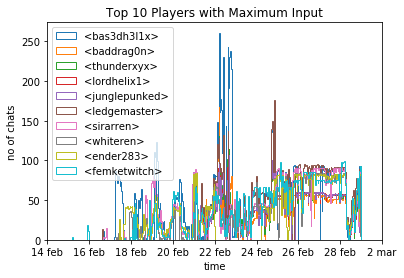

In [71]:
ax = plt.subplot(1, 1, 1)
plt.hist(chat1,density=False,bins=384,histtype='step',label='<bas3dh3l1x>')
plt.hist(chat2,density=False,bins=384,histtype='step',label='<baddrag0n>')
plt.hist(chat3,density=False,bins=384,histtype='step',label='<thunderxyx>')
plt.hist(chat4,density=False,bins=384,histtype='step',label='<lordhelix1>')
plt.hist(chat5,density=False,bins=384,histtype='step',label='<junglepunked>')
plt.hist(chat6,density=False,bins=384,histtype='step',label='<ledgemaster>')
plt.hist(chat7,density=False,bins=384,histtype='step',label='<sirarren>')
plt.hist(chat8,density=False,bins=384,histtype='step',label='<whiteren>')
plt.hist(chat9,density=False,bins=384,histtype='step',label='<ender283>')
plt.hist(chat10,density=False,bins=384,histtype='step',label='<femketwitch>')
plt.legend()
plt.title("Top 10 Players with Maximum Input")
plt.xlabel("time")
plt.ylabel("no of chats")
x_ticks_labels = ['14 feb','16 feb','18 feb','20 feb','22 feb','24 feb','26 feb','28 feb','2 mar']
ax.set_xticks(np.arange(0,1400000,174999))
ax.set_xticklabels(x_ticks_labels)
plt.show()

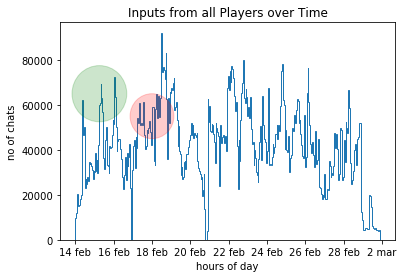

In [88]:
ax = plt.subplot(1, 1, 1)
plt.hist(time,density=False,bins=384,histtype='step')
plt.xlabel("hours of day")
plt.ylabel("no of chats")
x_ticks_labels = ['14 feb','16 feb','18 feb','20 feb','22 feb','24 feb','26 feb','28 feb','2 mar']
# x_ticks_labels = ['14 feb','16 feb','18 feb','20 feb']
ax.set_xticks(np.arange(0,1400000,174999))
ax.set_xticklabels(x_ticks_labels)
plt.title("Inputs from all Players over Time")
circle1=patches.Ellipse([110000,65000],250000,25000,color='green',alpha=0.2)
circle2=patches.Ellipse([350000,55000],200000,20000,color='red',alpha=0.2)
ax.add_artist(circle1)
ax.add_artist(circle2)
plt.savefig('C:/Users/kedar/OneDrive - UCB-O365/Documents/Thesis/twitch plays/data/chats_per_hour.png')
plt.show()

In [66]:
np.arange(0,1400000,174999)

array([      0.      ,  174999.999999,  349999.999998,  524999.999997,
        699999.999996,  874999.999995, 1049999.999994, 1224999.999993,
       1399999.999992])

In [6]:
# sort=['']*len(rows)
players=['']*len(rows)
for i in range(len(rows)):
    players[i]=a[i][2]
sort = list(dict.fromkeys(players))

In [6]:
from IPython.display import clear_output
import pymp
noofchats=[0]*len(sort)
with pymp.Parallel(4) as p:
    for i in p.range(len(sort)):
        noofchats[i]=players.count(sort[i])
        clear_output(wait=True)
        print(len(sort)-i,flush=True)

ModuleNotFoundError: No module named 'pymp'

In [29]:
from threading import Thread

noofchats=[0]*len(sort)
def loop(i):
    noofchats[i]=players.count(sort[i])
    print(748000-i)

for i in range(93499):
    t1=Thread(target=loop, args=(8*i,))
    t2=Thread(target=loop, args=(8*i+1,))
    t3=Thread(target=loop, args=(8*i+2,))
    t4=Thread(target=loop, args=(8*i+3,))
    t5=Thread(target=loop, args=(8*i+4,))
    t6=Thread(target=loop, args=(8*i+5,))
    t7=Thread(target=loop, args=(8*i+6,))
    t8=Thread(target=loop, args=(8*i+7,))
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t5.start()
    t6.start()
    t7.start()
    t8.start()

0
12

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
30
29
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
61
60
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


In [13]:
print(len(sort))

748006


In [1]:
plt.hist(noofchats,density=False,bins=384,histtype='step')
plt.show()

NameError: name 'plt' is not defined